# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [11]:
sum(data[data.race == 'b'].call)

157.0

In [16]:
white = sum(data[data.race=='w'].call) / len(data)
black = sum(data[data.race=='b'].call) / len(data)
w_and_b = sum(data.call) / len(data)

In [18]:
# white sounding name callback
white/w_and_b

0.5994897959183674

In [19]:
# black sounding name callback
black/w_and_b

0.4005102040816327

In [20]:
# difference
white/w_and_b - black/w_and_b

0.1989795918367347

White-sounding name got called back 59.95% of the time and black-sounding name got called back 40.05% of the time, white-sounding name got 19.9% more callback than black-sounding name.

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


**What are the null and alternative hypothesis?**

**Null:** There is no difference between callbacks for both groups

**Alternative:** There is a difference between callbacks for both groups


In [21]:
white_callback = data[data.race=='w'].call
black_callback = data[data.race=='b'].call
stats.ttest_ind(white_callback, black_callback)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)

According to the t-test, there is a significant difference between callbacks for white and black sounding names. Thus, we reject the nul hypothesis.

**Calculate margin of error and confidence interval for both group**

In [23]:
# white sounding name
ci = 1.96
p = white/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_low = p - margin_of_error
ci_high = p + margin_of_error
print("White-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_low, ',', ci_high)

White-sounding names
Mean:  0.5994897959183674
Margin of error:  0.013762244874422664
Confidence interval:  0.5857275510439447 , 0.61325204079279


In [24]:
# black sounding name
ci = 1.96
p = black/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_low = p - margin_of_error
ci_high = p + margin_of_error
print("Black-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_low, ',', ci_high)

Black-sounding names
Mean:  0.4005102040816327
Margin of error:  0.013762244874422664
Confidence interval:  0.38674795920721 , 0.41427244895605536


White-sounding names get called back between 58.6% - 61.3% of the time with margin of error of 1.4%.

Black-sounding names get called back between 38.7% - 41.4% of the time with margin of error of 1.4%

**Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?**

There are many more factors that should be taken account for callbacks. Name-types are correlated with callbacks does not mean that it cause more or less callbacks. 

We see that applicants with more than 10 years of experience get more callbacks compared to people less than 10 years of experience.



In [25]:
x = data[['yearsexp', 'call']]
y = x[x.yearsexp <= 10]
z = x[x.yearsexp > 10]

/Users/meiyanghuang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


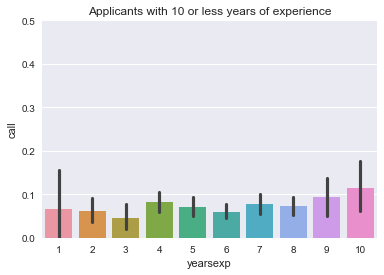

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x = 'yearsexp', y= 'call', data=y)
plt.ylim(0, 0.5)
plt.title('Applicants with 10 or less years of experience')
plt.show()

/Users/meiyanghuang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


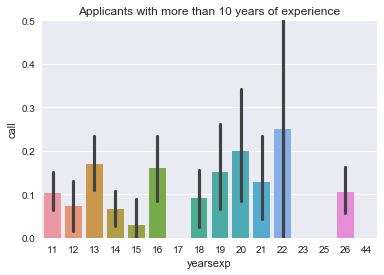

In [32]:
sns.barplot(x="yearsexp",y="call",data=z)
plt.ylim(0,0.5)
plt.title("Applicants with more than 10 years of experience")
plt.show()

/Users/meiyanghuang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


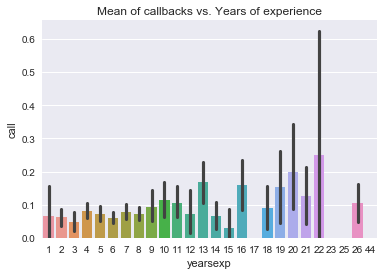

In [33]:
sns.barplot(x="yearsexp",y="call",data=x)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()